In [ ]:
"""
Data presentation of salaries in the field of data science. Data taken from Kaggle.
Data will be analyzed by company size and experience level. Count = ca. 250 entries.
htps://www.kaggle.com/datasets/saurabhshahane/data-science-jobs-salaries
"""

In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [3]:
data = pd.read_csv("files/data_science_salaries.csv")

In [5]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S


In [4]:
data.shape

(245, 11)

In [6]:
data.dtypes

work_year             object
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [7]:
data.isnull().any() #checking for null values

work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

In [8]:
data["work_year"].unique()

array(['2021e', '2020'], dtype=object)

In [9]:
data["experience_level"].unique()

array(['EN', 'SE', 'EX', 'MI'], dtype=object)

In [10]:
data.groupby("experience_level")["salary_in_usd"].describe()

,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,54.0,59753.462963,49103.427811,4000.0,21732.25,58800.5,82500.0,250000.0
EX,11.0,226288.000000,164029.405584,70329.0,114021.50,154963.0,280000.0,600000.0
MI,103.0,85738.135922,78324.468318,2876.0,40505.00,73000.0,110000.0,450000.0
SE,77.0,128841.298701,67909.763752,19052.0,78340.00,120000.0,170000.0,412000.0


In [11]:
data.groupby(["company_size", "experience_level"])["salary_in_usd"].describe()

count           mean            std      min  \
company_size experience_level                                                 
L            EN                 19.0   75148.000000   64087.707409   5898.0   
             EX                  8.0  239729.875000  163591.318040  79833.0   
             MI                 62.0   96285.451613   80426.650346   6072.0   
             SE                 43.0  134465.604651   74345.888870  21843.0   
M            EN                 13.0   41063.923077   30822.672549   4000.0   
             EX                  1.0   85000.000000            NaN  85000.0   
             MI                 25.0   83982.800000   87827.739265   4000.0   
             SE                 16.0  122572.125000   51404.202382  19052.0   
S            EN                 22.0   57502.000000   39823.933768   6072.0   
             EX                  2.0  243164.500000  244426.308160  70329.0   
             MI                 16.0   47610.000000   32458.213574   2876.0   
             SE                 18.0  120978.055556   66689.351887  33511.0   

                                     25%       50%        75%       max  
company_size experience_level                                            
L            EN                 33730.50   64369.0   87000.00  250000.0  
             EX                148260.75  192481.5  257500.00  600000.0  
             MI                 46851.50   82500.0  112654.00  450000.0  
             SE                 74147.00  135000.0  174000.00  412000.0  
M            EN                 21695.00   28475.0   65561.00  100000.0  
             EX                 85000.00   85000.0   85000.00   85000.0  
             MI                 38776.00   61985.0  111775.00  450000.0  
             SE                 94552.00  117062.5  166250.00  195000.0  
S            EN                 18993.75   55660.5   88750.00  138000.0  
             EX                156746.75  243164.5  329582.25  416000.0  
             MI                 17737.25   46720.5   68300.00  110000.0  
             SE                 78110.75  108898.5  160000.00  260000.0

<AxesSubplot:title={'center':'salary_in_usd'}, xlabel='company_size'>

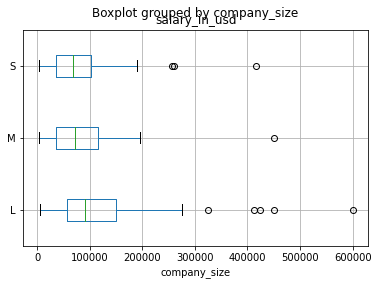

In [29]:
data.boxplot(column="salary_in_usd", by="company_size", vert=False)

<AxesSubplot:title={'center':'salary_in_usd'}, xlabel='experience_level'>

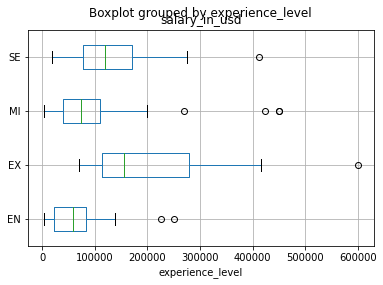

In [26]:
data.boxplot(column="salary_in_usd", by="experience_level", vert=False)

In [15]:
plot_data = data.groupby(['company_size', 'experience_level'])['salary_in_usd'].mean().unstack() #unstacks multiindex
plot_data

experience_level,EN,EX,MI,SE
company_size,,,,
L,75148.000000,239729.875,96285.451613,134465.604651
M,41063.923077,85000.000,83982.800000,122572.125000
S,57502.000000,243164.500,47610.000000,120978.055556


In [16]:
plot_data = plot_data.reindex(index=['S', 'M', 'L'])
plot_data = plot_data[['EN', 'MI', 'SE', 'EX']] #reindexing to match experience level ascending
plot_data

experience_level,EN,MI,SE,EX
company_size,,,,
S,57502.000000,47610.000000,120978.055556,243164.500
M,41063.923077,83982.800000,122572.125000,85000.000
L,75148.000000,96285.451613,134465.604651,239729.875


<AxesSubplot:title={'center':'Salaries in the field of data science'}, xlabel='company_size', ylabel='USD salary'>

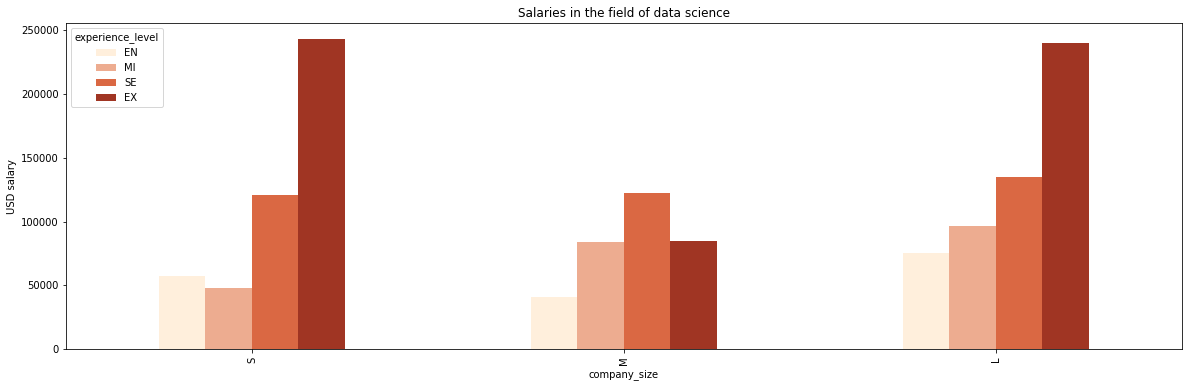

In [23]:
plot_data.plot.bar(ylabel = "USD salary", title = "Salaries in the field of data science", figsize=(20,6), color=("#ffefdc", "#edac90", "#da6843", "#a03523"))